In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [2]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (18327, 8)
Checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
#Dropping the column
covid.drop(["SNo"],1,inplace=True)

In [5]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
5       2020-01-22
6       2020-01-22
7       2020-01-22
8       2020-01-22
9       2020-01-22
10      2020-01-22
11      2020-01-22
12      2020-01-22
13      2020-01-22
14      2020-01-22
15      2020-01-22
16      2020-01-22
17      2020-01-22
18      2020-01-22
19      2020-01-22
20      2020-01-22
21      2020-01-22
22      2020-01-22
23      2020-01-22
24      2020-01-22
25      2020-01-22
26      2020-01-22
27      2020-01-22
28      2020-01-22
29      2020-01-22
           ...    
18297   2020-04-24
18298   2020-04-24
18299   2020-04-24
18300   2020-04-24
18301   2020-04-24
18302   2020-04-24
18303   2020-04-24
18304   2020-04-24
18305   2020-04-24
18306   2020-04-24
18307   2020-04-24
18308   2020-04-24
18309   2020-04-24
18310   2020-04-24
18311   2020-04-24
18312   2020-04-24
18313   2020-04-24
18314   2020-04-24
18315   2020-04-24
18316   2020-04-24
18317   2020-04-24
18318   2020

In [7]:
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
2020-01-27,2927.0,61.0,82.0
2020-01-28,5578.0,107.0,131.0
2020-01-29,6165.0,126.0,133.0
2020-01-30,8235.0,143.0,171.0


In [8]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

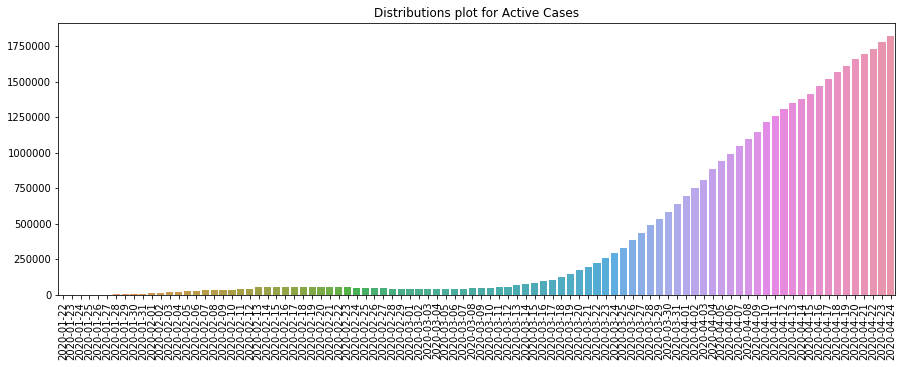

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

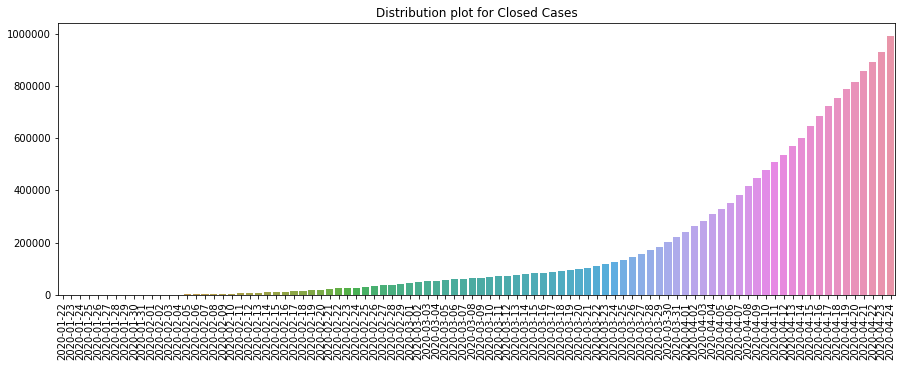

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

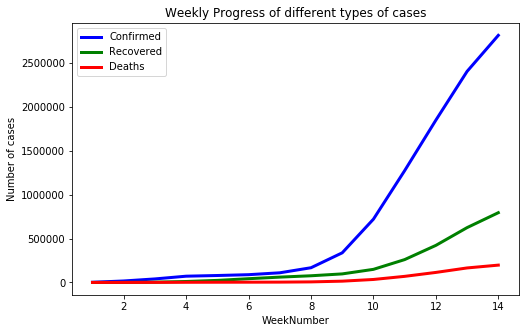

In [12]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,'b',linewidth=3)
plt.plot(week_num,weekwise_recovered,'g',linewidth =3)
plt.plot(week_num,weekwise_deaths,'r',linewidth = 3)
plt.legend(['Confirmed','Recovered','Deaths'])
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

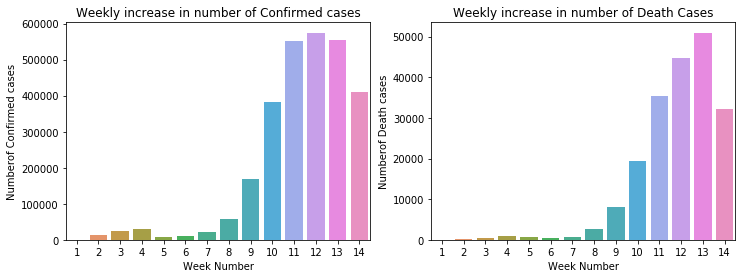

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Death cases everyday: 2097.0


C:\Users\nites\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


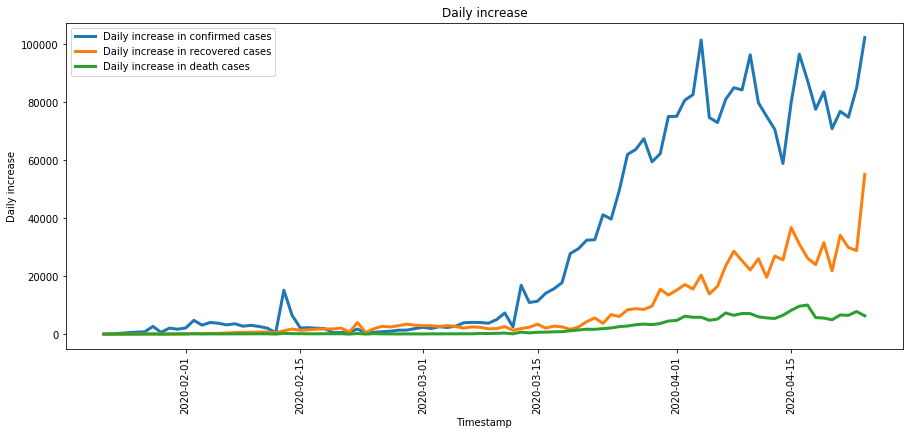

In [14]:
from pandas.plotting import register_matplotlib_converters
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [15]:
#Country wise analysis
#Calculating Country wise Mortality rate
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
print("Countrywise Mortality:",countrywise["Mortality"])
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
print("Countrywise Recovered:",countrywise["Recovered"])

Countrywise Mortality: Country/Region
US                                    52.431898
Spain                                 24.388501
Italy                                 42.925386
France                                50.324140
Germany                                5.245902
UK                                  2702.624309
Turkey                                11.961172
Iran                                   8.369495
Mainland China                         5.987823
Russia                                11.045259
Brazil                                13.393600
Belgium                               65.984983
Canada                                15.750215
Netherlands                         4219.607843
Switzerland                            7.566667
India                                 14.186977
Portugal                              69.543974
Ecuador                               42.166911
Peru                                   8.457844
Ireland                               10.982346
Sw

Text(0.5, 1.0, 'Top 15 countries as per number of cases')

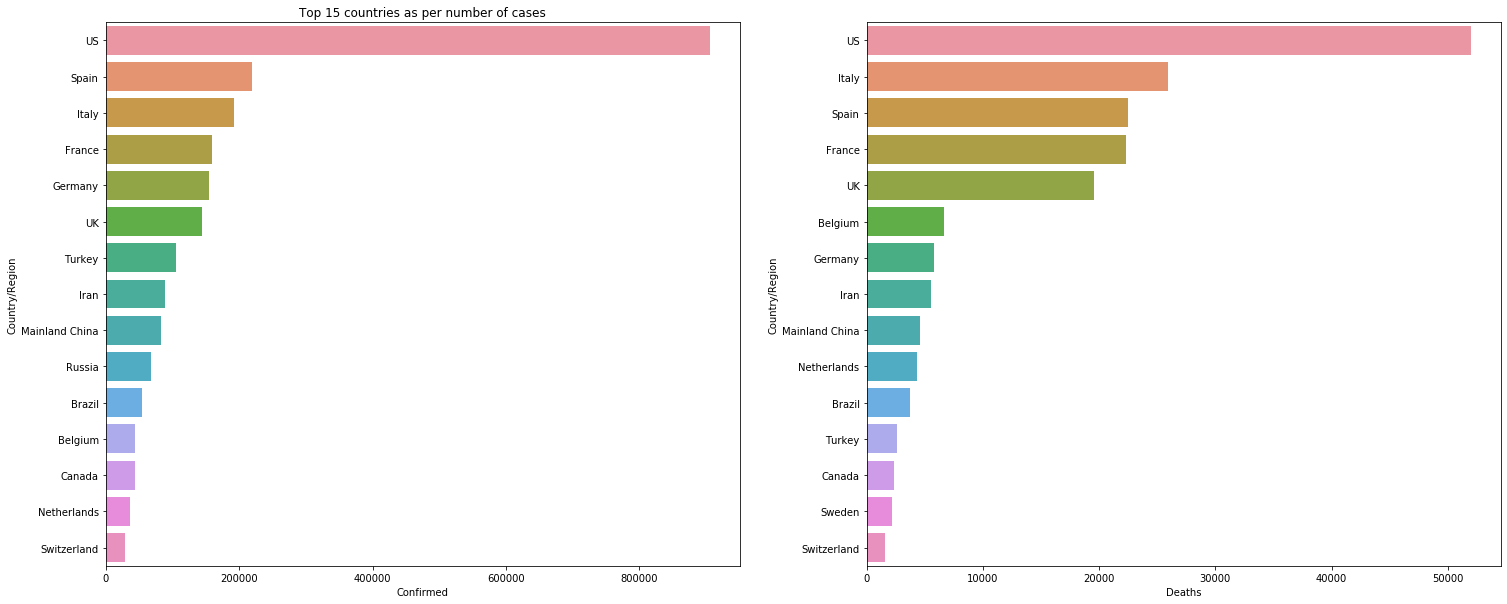

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countries as per number of cases")

In [17]:
#Data Anlaysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0


In [18]:
#Data Anlaysis for US
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 754305.0
Total Closed Cases 151028.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases in India')

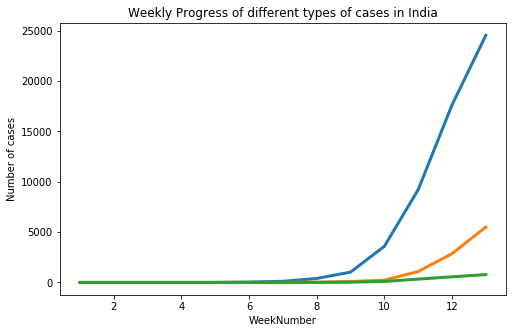

In [19]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases in India")

In [20]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach to same number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach to same number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach to same number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach to same number of Confirmed Cases")

It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in Italy to reach to same number of Confirmed Cases
It took 59 days in US to reach to same number of Confirmed Cases
It took 49 days in Spain to reach to same number of Confirmed Cases
It took 14 days in China to reach to same number of Confirmed Cases


In [21]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
print(datewise["Days Since"])
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

ObservationDate
2020-01-22     0
2020-01-23     1
2020-01-24     2
2020-01-25     3
2020-01-26     4
2020-01-27     5
2020-01-28     6
2020-01-29     7
2020-01-30     8
2020-01-31     9
2020-02-01    10
2020-02-02    11
2020-02-03    12
2020-02-04    13
2020-02-05    14
2020-02-06    15
2020-02-07    16
2020-02-08    17
2020-02-09    18
2020-02-10    19
2020-02-11    20
2020-02-12    21
2020-02-13    22
2020-02-14    23
2020-02-15    24
2020-02-16    25
2020-02-17    26
2020-02-18    27
2020-02-19    28
2020-02-20    29
              ..
2020-03-26    64
2020-03-27    65
2020-03-28    66
2020-03-29    67
2020-03-30    68
2020-03-31    69
2020-04-01    70
2020-04-02    71
2020-04-03    72
2020-04-04    73
2020-04-05    74
2020-04-06    75
2020-04-07    76
2020-04-08    77
2020-04-09    78
2020-04-10    79
2020-04-11    80
2020-04-12    81
2020-04-13    82
2020-04-14    83
2020-04-15    84
2020-04-16    85
2020-04-17    86
2020-04-18    87
2020-04-19    88
2020-04-20    89
2020-04-21    9

In [22]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [23]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [41]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,180):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-04-25,374986,867571
1,2020-04-26,380139,914183
2,2020-04-27,385291,962798
3,2020-04-28,390444,1013483
4,2020-04-29,395597,1066301
5,2020-04-30,400749,1121319
6,2020-05-01,405902,1178606
7,2020-05-02,411055,1238231
8,2020-05-03,416207,1300264
9,2020-05-04,421360,1364779


In [25]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [26]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [40]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,180):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(10)

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,374986,867571,674511
1,2020-04-26,380139,914183,694485
2,2020-04-27,385291,962798,714458
3,2020-04-28,390444,1013483,734432
4,2020-04-29,395597,1066301,754405
5,2020-04-30,400749,1121319,774379
6,2020-05-01,405902,1178606,794352
7,2020-05-02,411055,1238231,814326
8,2020-05-03,416207,1300264,834300
9,2020-05-04,421360,1364779,854273


In [28]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [29]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [39]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,180):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-04-25,374986,867571
1,2020-04-26,380139,914183
2,2020-04-27,385291,962798
3,2020-04-28,390444,1013483
4,2020-04-29,395597,1066301
5,2020-04-30,400749,1121319
6,2020-05-01,405902,1178606
7,2020-05-02,411055,1238231
8,2020-05-03,416207,1300264
9,2020-05-04,421360,1364779


In [31]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [36]:
holt=Holt(np.asarray(model_train["Recovered"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [38]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,180):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(10)

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,374986,867571,674511
1,2020-04-26,380139,914183,694485
2,2020-04-27,385291,962798,714458
3,2020-04-28,390444,1013483,734432
4,2020-04-29,395597,1066301,754405
5,2020-04-30,400749,1121319,774379
6,2020-05-01,405902,1178606,794352
7,2020-05-02,411055,1238231,814326
8,2020-05-03,416207,1300264,834300
9,2020-05-04,421360,1364779,854273


In [42]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,180):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Dates,LR,SVR
0,2020-04-25,93491,234630
1,2020-04-26,94823,247373
2,2020-04-27,96155,260663
3,2020-04-28,97487,274519
4,2020-04-29,98819,288959
5,2020-04-30,100151,303999
6,2020-05-01,101483,319660
7,2020-05-02,102815,335961
8,2020-05-03,104146,352919
9,2020-05-04,105478,370556


In [44]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]
holt=Holt(np.asarray(model_train["Deaths"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,180):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(10)

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,93491,234630,190419
1,2020-04-26,94823,247373,196314
2,2020-04-27,96155,260663,202210
3,2020-04-28,97487,274519,208105
4,2020-04-29,98819,288959,214001
5,2020-04-30,100151,303999,219896
6,2020-05-01,101483,319660,225792
7,2020-05-02,102815,335961,231687
8,2020-05-03,104146,352919,237583
9,2020-05-04,105478,370556,243478
